In [1]:
import chess
import time
import random
import pandas as pd

import workers
from multiprocessing import Pool

import multiprocessing as mp
from multiprocessing import Pool
from functools import partial

from IPython.display import display, HTML, clear_output, Image

In [2]:
#saber de quien es el turno
def who(player):
    return "Blanco" if player == chess.WHITE else "Negro"

In [3]:
#Jugador Aleatorio
def jugador_v0(board,color,depth):
    move = random.choice(list(board.legal_moves))
    return move.uci()

In [4]:
#definir las matrices para obtener el puntaje de las posición de destino del caballo

wb_horse = pd.DataFrame({"a":[-5.0,-4.0,-3.0,-3.0,-3.0,-3.0,-4.0,-5.0],
                         "b":[-4.0,-2.0,00.0,00.5,00.0,00.5,-2.0,-4.0],
                         "c":[-3.0,00.0,01.0,01.5,01.5,01.0,00.0,-3.0],
                         "d":[-3.0,00.0,01.5,02.0,02.0,01.5,00.5,-3.0],
                         "e":[-3.0,00.0,01.5,02.0,02.0,01.5,00.5,-3.0],
                         "f":[-3.0,00.0,01.0,01.5,01.5,01.0,00.0,-3.0],
                         "g":[-4.0,-2.0,00.0,00.5,00.0,00.5,-2.0,-4.0],
                         "h":[-5.0,-4.0,-3.0,-3.0,-3.0,-3.0,-4.0,-5.0]})



wb_horse


a    b    c    d    e    f    g    h
0 -5.0 -4.0 -3.0 -3.0 -3.0 -3.0 -4.0 -5.0
1 -4.0 -2.0  0.0  0.0  0.0  0.0 -2.0 -4.0
2 -3.0  0.0  1.0  1.5  1.5  1.0  0.0 -3.0
3 -3.0  0.5  1.5  2.0  2.0  1.5  0.5 -3.0
4 -3.0  0.0  1.5  2.0  2.0  1.5  0.0 -3.0
5 -3.0  0.5  1.0  1.5  1.5  1.0  0.5 -3.0
6 -4.0 -2.0  0.0  0.5  0.5  0.0 -2.0 -4.0
7 -5.0 -4.0 -3.0 -3.0 -3.0 -3.0 -4.0 -5.0

In [5]:
#definir las matrices para obtener el puntaje de las posición de destino del alfil

wb_alfil = pd.DataFrame({"a":[-2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0],
                         "b":[-1.0,00.0,00.0,00.5,00.0,01.0,00.5,-1.0],
                         "c":[-1.0,00.0,00.5,00.5,01.0,01.0,00.0,-1.0],
                         "d":[-1.0,00.0,01.0,01.0,01.0,01.0,00.0,-1.0],
                         "e":[-1.0,00.0,01.0,01.0,01.0,01.0,00.0,-1.0],
                         "f":[-1.0,00.0,00.5,00.5,01.0,01.0,00.0,-1.0],
                         "g":[-1.0,00.0,00.0,00.5,00.0,01.0,00.5,-1.0],
                         "h":[-2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0]})



wb_alfil

a    b    c    d    e    f    g    h
0 -2.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -2.0
1 -1.0  0.0  0.0  0.0  0.0  0.0  0.0 -1.0
2 -1.0  0.0  0.5  1.0  1.0  0.5  0.0 -1.0
3 -1.0  0.5  0.5  1.0  1.0  0.5  0.5 -1.0
4 -1.0  0.0  1.0  1.0  1.0  1.0  0.0 -1.0
5 -1.0  1.0  1.0  1.0  1.0  1.0  1.0 -1.0
6 -1.0  0.5  0.0  0.0  0.0  0.0  0.5 -1.0
7 -2.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -2.0

In [6]:
#definir las matrices para obtener el puntaje de las posición de destino del rey blanco

w_rey = pd.DataFrame({"a":[-3.0,-3.0,-3.0,-3.0,-2.0,-1.0,02.0,02.0],
                      "b":[-4.0,-4.0,-4.0,-4.0,-3.0,-2.0,02.0,03.0],
                      "c":[-4.0,-4.0,-4.0,-4.0,-3.0,-2.0,-1.0,-1.0],
                      "d":[-5.0,-5.0,-5.0,-5.0,-4.0,-2.0,-5.0,-5.0],
                      "e":[-5.0,-5.0,-5.0,-5.0,-4.0,-2.0,-5.0,00.0],
                      "f":[-4.0,-4.0,-4.0,-4.0,-3.0,-2.0,-5.0,-5.0],
                      "g":[-4.0,-4.0,-4.0,-4.0,-3.0,-2.0,02.0,03.0],
                      "h":[-3.0,-3.0,-3.0,-3.0,-2.0,-1.0,02.0,02.0]})



w_rey

a    b    c    d    e    f    g    h
0 -3.0 -4.0 -4.0 -5.0 -5.0 -4.0 -4.0 -3.0
1 -3.0 -4.0 -4.0 -5.0 -5.0 -4.0 -4.0 -3.0
2 -3.0 -4.0 -4.0 -5.0 -5.0 -4.0 -4.0 -3.0
3 -3.0 -4.0 -4.0 -5.0 -5.0 -4.0 -4.0 -3.0
4 -2.0 -3.0 -3.0 -4.0 -4.0 -3.0 -3.0 -2.0
5 -1.0 -2.0 -2.0 -2.0 -2.0 -2.0 -2.0 -1.0
6  2.0  2.0 -1.0 -5.0 -5.0 -5.0  2.0  2.0
7  2.0  3.0 -1.0 -5.0  0.0 -5.0  3.0  2.0

In [7]:
#La matriz del rey negro es inversa del rey blanco
b_rey = w_rey.iloc[::-1]

b_rey

a    b    c    d    e    f    g    h
7  2.0  3.0 -1.0 -5.0  0.0 -5.0  3.0  2.0
6  2.0  2.0 -1.0 -5.0 -5.0 -5.0  2.0  2.0
5 -1.0 -2.0 -2.0 -2.0 -2.0 -2.0 -2.0 -1.0
4 -2.0 -3.0 -3.0 -4.0 -4.0 -3.0 -3.0 -2.0
3 -3.0 -4.0 -4.0 -5.0 -5.0 -4.0 -4.0 -3.0
2 -3.0 -4.0 -4.0 -5.0 -5.0 -4.0 -4.0 -3.0
1 -3.0 -4.0 -4.0 -5.0 -5.0 -4.0 -4.0 -3.0
0 -3.0 -4.0 -4.0 -5.0 -5.0 -4.0 -4.0 -3.0

In [8]:
#definir las matrices para obtener el puntaje de las posición de destino de la reina

wb_queen = pd.DataFrame({"a":[-2.0,-1.0,-1.0,-0.5,00.0,-1.0,-1.0,-2.0],
                         "b":[-1.0,00.0,00.0,00.0,00.0,00.5,00.0,-1.0],
                         "c":[-1.0,00.0,00.5,00.5,00.5,00.5,00.5,-1.0],
                         "d":[-0.5,00.0,00.5,00.5,00.5,00.5,00.0,-0.5],
                         "e":[-0.5,00.0,00.5,00.5,00.5,00.5,00.0,-0.5],
                         "f":[-1.0,00.0,00.5,00.5,00.5,00.5,00.5,-1.0],
                         "g":[-1.0,00.0,00.0,00.0,00.0,00.5,00.0,-1.0],
                         "h":[-2.0,-1.0,-1.0,-0.5,00.0,-1.0,-1.0,-2.0]})



wb_queen

a    b    c    d    e    f    g    h
0 -2.0 -1.0 -1.0 -0.5 -0.5 -1.0 -1.0 -2.0
1 -1.0  0.0  0.0  0.0  0.0  0.0  0.0 -1.0
2 -1.0  0.0  0.5  0.5  0.5  0.5  0.0 -1.0
3 -0.5  0.0  0.5  0.5  0.5  0.5  0.0 -0.5
4  0.0  0.0  0.5  0.5  0.5  0.5  0.0  0.0
5 -1.0  0.5  0.5  0.5  0.5  0.5  0.5 -1.0
6 -1.0  0.0  0.5  0.0  0.0  0.5  0.0 -1.0
7 -2.0 -1.0 -1.0 -0.5 -0.5 -1.0 -1.0 -2.0

In [9]:
#definir las matrices para obtener el puntaje de las posición de destino del torre

wb_torre = pd.DataFrame({"a":[00.0,00.5,-0.5,-0.5,-0.5,-0.5,-0.5,00.0],
                         "b":[00.0,01.0,00.0,00.0,00.0,00.0,00.0,00.0],
                         "c":[00.0,01.0,00.0,00.0,00.0,00.0,00.0,00.0],
                         "d":[00.0,01.0,00.0,00.0,00.0,00.0,00.0,00.5],
                         "e":[00.0,01.0,00.0,00.0,00.0,00.0,00.0,00.5],
                         "f":[00.0,01.0,00.0,00.0,00.0,00.0,00.0,00.0],
                         "g":[00.0,01.0,00.0,00.0,00.0,00.0,00.0,00.0],
                         "h":[00.0,00.5,-0.5,-0.5,-0.5,-0.5,-0.5,00.0]})



wb_torre

a    b    c    d    e    f    g    h
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.5  1.0  1.0  1.0  1.0  1.0  1.0  0.5
2 -0.5  0.0  0.0  0.0  0.0  0.0  0.0 -0.5
3 -0.5  0.0  0.0  0.0  0.0  0.0  0.0 -0.5
4 -0.5  0.0  0.0  0.0  0.0  0.0  0.0 -0.5
5 -0.5  0.0  0.0  0.0  0.0  0.0  0.0 -0.5
6 -0.5  0.0  0.0  0.0  0.0  0.0  0.0 -0.5
7  0.0  0.0  0.0  0.5  0.5  0.0  0.0  0.0

In [10]:
#definir las matrices para obtener el puntaje de las posición de destino del peon blanco
#index=[8,7,6,5,4,3,2,1]

w_pawn = pd.DataFrame({"a":[10.0,5.0,1.0,0.5,0.0,00.5,0.0,0.0],
                       "b":[10.0,5.0,1.0,0.5,0.0,-0.5,0.0,0.0],
                       "c":[10.0,5.0,2.0,1.0,0.0,-1.0,0.0,0.0],
                       "d":[10.0,5.0,3.0,2.5,2.0,00.0,0.0,0.0],
                       "e":[10.0,5.0,3.0,2.5,2.0,00.0,0.0,0.0],
                       "f":[10.0,5.0,2.0,1.0,0.0,-1.0,0.0,0.0],
                       "g":[10.0,5.0,1.0,0.5,0.0,-0.5,0.0,0.0],
                       "h":[10.0,5.0,1.0,0.5,0.0,00.5,0.0,0.0]})



w_pawn

a     b     c     d     e     f     g     h
0  10.0  10.0  10.0  10.0  10.0  10.0  10.0  10.0
1   5.0   5.0   5.0   5.0   5.0   5.0   5.0   5.0
2   1.0   1.0   2.0   3.0   3.0   2.0   1.0   1.0
3   0.5   0.5   1.0   2.5   2.5   1.0   0.5   0.5
4   0.0   0.0   0.0   2.0   2.0   0.0   0.0   0.0
5   0.5  -0.5  -1.0   0.0   0.0  -1.0  -0.5   0.5
6   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
7   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0

In [11]:
#La matriz del peon negro es inversa del peon blanco
b_pawn = w_pawn.iloc[::-1]

b_pawn

a     b     c     d     e     f     g     h
7   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
6   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
5   0.5  -0.5  -1.0   0.0   0.0  -1.0  -0.5   0.5
4   0.0   0.0   0.0   2.0   2.0   0.0   0.0   0.0
3   0.5   0.5   1.0   2.5   2.5   1.0   0.5   0.5
2   1.0   1.0   2.0   3.0   3.0   2.0   1.0   1.0
1   5.0   5.0   5.0   5.0   5.0   5.0   5.0   5.0
0  10.0  10.0  10.0  10.0  10.0  10.0  10.0  10.0

In [12]:
#Matriz temporal para las demas piezas
wb_other = pd.DataFrame({"a":[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
                         "b":[1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0],
                         "c":[1.0,2.0,3.0,3.0,3.0,3.0,2.0,1.0],
                         "d":[1.0,2.0,3.0,4.0,4.0,3.0,2.0,1.0],
                         "e":[1.0,2.0,3.0,4.0,4.0,3.0,2.0,1.0],
                         "f":[1.0,2.0,3.0,3.0,3.0,3.0,2.0,1.0],
                         "g":[1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0],
                         "h":[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]})
wb_other

a    b    c    d    e    f    g    h
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
1  1.0  2.0  2.0  2.0  2.0  2.0  2.0  1.0
2  1.0  2.0  3.0  3.0  3.0  3.0  2.0  1.0
3  1.0  2.0  3.0  4.0  4.0  3.0  2.0  1.0
4  1.0  2.0  3.0  4.0  4.0  3.0  2.0  1.0
5  1.0  2.0  3.0  3.0  3.0  3.0  2.0  1.0
6  1.0  2.0  2.0  2.0  2.0  2.0  2.0  1.0
7  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [13]:
def get_move(prompt):
    uci = input(prompt)
    if uci and uci[0] == "q":
        raise KeyboardInterrupt()
    try:
        chess.Move.from_uci(uci)
    except:
        uci = None
    return uci

In [14]:
def jugador_humano(board, color, depth):
    #display(board)
    uci = get_move("%s's move [q to quit]> " % who(board.turn))
    legal_uci_moves = [move.uci() for move in board.legal_moves]
    while uci not in legal_uci_moves:
        print("Legal moves: " + (",".join(sorted(legal_uci_moves))))
        uci = get_move("%s's move[q to quit]> " % who(board.turn))
    return uci

In [15]:
#Diccionario para traducir letra a indice de la columna en el DF
col_dict = {"a":0,"b":1,"c":2,"d":3,"e":4,"f":5,"g":6,"h":7}

#Diccionario para los valores de las piezas
dict_piezes_value ={"Pawn":10,"Bishop":30,"Knight":30,"Rook":50,"Queen":90,"King":0}

#dict_piezes_short_value = {"P":10,"B":30,"N":30,"R":50,"Q":90,"K":0}

In [16]:
def analisis_v5(board,move,player_color, original_player_color):
    
    #Esta versión regresa positivo si juega blanco, negativo si juega negro
    
    ############################################ General ############################################
    
    #global col_dict
    #global dict_piezes_value
    
    #Puntaje inicial
    score= 0
    
    #Variable que ayuda al cálculo de score_is_attacked. Indica la proporción del valor de la pieza que se restará del puntaje
    #Valor original 0.7
    proporcion_perder_pieza = 0.8
    
    #Diccionario para traducir letra a indice de la columna en el DF
    col_dict = {"a":0,"b":1,"c":2,"d":3,"e":4,"f":5,"g":6,"h":7}
    
    #Diccionario para los valores de las piezas
    dict_piezes_value ={"Pawn":10,"Bishop":30,"Knight":30,"Rook":50,"Queen":90,"King":0}
    
    #El movimiento viene formato UCI p.e.: "e3f3"
    # "e3" es el lugar de origen y "f3" es el destino
    #move_str =  str(move)    
    #String que representa la posición de origen del movimiento
    #move_org = move_str[0] + move_str[1] 
    #String que representa la posición de destino del movimiento
    #move_des = move_str[2] + move_str[3]
    move_org = str(move)[:2]
    move_des = str(move)[2:4]
    
    #Score para priorizar el movimiento de peones en el early game
    score_early_move=0
    #Score para priorizar el movimiento de peones en el late game
    score_late_move=0
    #Score inicial si estoy en jaque
    score_estoy_en_jaque=0
    #Valor inicial del score que obtengo si el movimiento provoca que me ponga en peligro de ser atacado
    score_is_attacked=0
    #Valor inicial del score que obtengo de la posición donde se vaya a mover la pieza
    score_mov=0
    #Score que da puntos si el movimiento resulta en comer las piezas del oponente
    score_tablero=0
    #Aumenta score si deja en jaque mate al oponente
    score_check_mate = 0
    #Penalizar que regrese a su posición anterior
    score_regreso=0
    #Dar puntos si pongo en jaque
    score_is_check=0
    #Dar puntos si, después del movimiento amenazo las piezas del oponente o cubro mis piezas
    score_is_attacking=0
    #Evitar empate si el tablero es favorable
    score_evitar_empate =0
    #Buscar empate si el tablero no es favorable
    score_buscar_empate=0
    #Score si estoy siendo atacado en mi casilla de origen
    score_origin_attacked=0
    #Score enroque
    score_is_castling=0
    
    ############################################ Mi Turno ############################################
    
    #Dar más puntos si se puede realizar el enroque
    score_is_castling = 10 if board.is_castling(move) else 0
    
    
    #Detecto si el movimiento de mi oponente me dejó en jaque
    estoy_en_jaque = board.is_check()
    
    #Detecto donde está la pieza antes de que se realice el movimiento
    pieza_org = str( board.piece_at( chess.SQUARES[chess.SQUARE_NAMES.index(move_org)] ))
    
    
    #Tabla para signar prioridad a que se mueva la pieza ya que la están atacando en su posición original
    if pieza_org == "P" or pieza_org == "p":
        score_origin_attacked = dict_piezes_value.get("Pawn")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_org)]))
    
    elif pieza_org =="B" or pieza_org == "b":
        score_origin_attacked = dict_piezes_value.get("Bishop")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_org)]))
        
    elif pieza_org=="R" or pieza_org=="r":
        score_origin_attacked = dict_piezes_value.get("Rook")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_org)]))
    
    elif pieza_org=="N" or pieza_org=="n":
        score_origin_attacked = dict_piezes_value.get("Knight")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_org)]))
        
    elif pieza_org=="Q" or pieza_org=="q":
        score_origin_attacked = dict_piezes_value.get("Queen")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_org)]))
    else:
        score_origin_attacked = dict_piezes_value.get("King")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_org)]))
    
    
    ############################################ Turno Oponente ############################################
    
    #Ejecutar movimiento
    board.push(move)
    
    #Pieza que se encuentra en el lugar de origen (e3)
    #Usando los metodos de la librería puedo pasar el string de la posición y obtener la pieza que se encuentra en ese lugar
    pieza_org = str( board.piece_at( chess.SQUARES[chess.SQUARE_NAMES.index(move_des)] ))
    
    
    #iloc[row,col]
    if pieza_org == "P":
        score_mov =  w_pawn.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ] 
        score_is_attacked = (-1)*dict_piezes_value.get("Pawn")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
        #Aumento la puntuación del Peon si estuve en jaque (prefiero quitar el jaque moviendo el peon)
        score_estoy_en_jaque = (8 if estoy_en_jaque== True else 0)
        #Priorizar en el juego inicial tratar de balancear el movimiento de los peones
        score_early_move = 2 if len(board.move_stack) < 18 else 0
        #Priorizar en el juego tardio para tratar de balancear el movimiento de los peones
        score_late_move = 4 if len(board.move_stack)>60 else 0
        
        
    elif pieza_org == "p":
        score_mov =  b_pawn.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ] 
        score_is_attacked = (-1)*dict_piezes_value.get("Pawn")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
        #Aumento la puntuación del Peon si estuve en jaque (prefiero quitar el jaque moviendo el peon)
        score_estoy_en_jaque = (8 if estoy_en_jaque== True else 0)
        #Priorizar en el juego inicial tratar de balancear el movimiento de los peones
        score_early_move = 2 if len(board.move_stack) < 18 else 0
        #Priorizar en el juego tardio para tratar de balancear el movimiento de los peones
        score_late_move = 4 if len(board.move_stack)>60 else 0
        
        
    elif pieza_org =="R" or pieza_org =="r":
        score_mov =  wb_torre.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ]
        score_is_attacked = (-1)*dict_piezes_value.get("Rook")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
        
    elif pieza_org == "N" or pieza_org=="n":
        score_mov =  wb_horse.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ]
        score_is_attacked = (-1)*dict_piezes_value.get("Knight")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
        
    elif pieza_org == "Q" or pieza_org=="q":
        score_mov =  wb_queen.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ]
        score_is_attacked = (-1)*dict_piezes_value.get("Queen")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
        
    elif pieza_org == "B" or pieza_org=="b":
        score_mov =  wb_alfil.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ]
        score_is_attacked = (-1)*dict_piezes_value.get("Bishop")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
        
    elif pieza_org == "K":
        score_mov =  w_rey.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ]
        score_is_attacked = (-1)*dict_piezes_value.get("King")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))        
        
    else:
        score_mov =  b_rey.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ]
        score_is_attacked = (-1)*dict_piezes_value.get("King")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
    
    
    #ciclo que revisa en el tablero el par pieza/valor
    for (pieza,valor) in [(chess.PAWN,dict_piezes_value.get("Pawn")),(chess.BISHOP,dict_piezes_value.get("Bishop")),
                          (chess.KNIGHT,dict_piezes_value.get("Knight")),(chess.ROOK,dict_piezes_value.get("Rook")),
                          (chess.QUEEN,dict_piezes_value.get("Queen")),(chess.KING,dict_piezes_value.get("King"))]:
        #el puntaje será mayor a cero si (suponiendo misma cantidad de piezas blancas y negras) el movimiento resulta en
        #la captura de una pieza
        score_tablero += len(board.pieces(pieza,player_color))*valor
        score_tablero -= len(board.pieces(pieza,not player_color))*valor
    
    
    score_check_mate = 1000 if board.is_checkmate() else 0
    

    #Se comentó la sección que evita recursividades
#     mov_anterior="    "
#     if len(board.move_stack)>2:
#         move_stack=list(board.move_stack)
#         mov_anterior = str( move_stack[len(move_stack)-3])
#         if move_str == (mov_anterior[2]+mov_anterior[3]+mov_anterior[0]+mov_anterior[1]):
#             score_regreso+= -8.5
            
#     if len(board.move_stack)>4:
#         move_stack=list(board.move_stack)
#         mov_anterior = str( move_stack[len(move_stack)-5])
#         if move_str == (mov_anterior[2]+mov_anterior[3]+mov_anterior[0]+mov_anterior[1]):
#             score_regreso+= -4
    
#     if len(board.move_stack)>6:
#         move_stack=list(board.move_stack)
#         mov_anterior = str( move_stack[len(move_stack)-7])
#         if move_str == (mov_anterior[2]+mov_anterior[3]+mov_anterior[0]+mov_anterior[1]):
#             score_regreso+= -4

    
    score_is_check = 3 if board.is_check() else 0
    
    
    #Lista de lugares donde puede moverse desde su posición actual
    list_possible_squares = list(board.attacks(chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
    #Checar si esos cuadros están vacíos o no
    #Considera piezas amigas como enemigas
    list_attacked_pieces = [square for square in list_possible_squares if  
                            str(board.piece_at(square)).upper() in ["P","B","N","K","Q","R"] ]
    score_is_attacking = (len(list_attacked_pieces)*1) * (0.4 if pieza_org.upper()=="Q" else 1 ) *(0.75 if pieza_org.upper()=="N" else 1)
    
    
    #Le bajo la puntación al movimiento ya que trato de evitar un empate
    if (board.is_stalemate() or board.is_fivefold_repetition() or board.is_insufficient_material() or board.can_claim_draw()) and \
        score_tablero>=0 :
        score_evitar_empate= -1000
    
    
    #Le aumento la puntuación al tablero ya que voy perdiendo y busco al menos empatar
    if (board.is_stalemate() or board.is_fivefold_repetition() or board.is_insufficient_material() or board.can_claim_draw()) and \
        score_tablero<(((dict_piezes_value.get("Knight")+dict_piezes_value.get("Rook")+dict_piezes_value.get("Bishop"))*(-2)) - dict_piezes_value.get("Queen")) :
        score_buscar_empate= 500
    

    #El score final es el resultado de todos los scores incluyendo un valor de random
    score = score_mov + score_tablero + score_regreso + score_check_mate + score_is_check + score_is_attacked \
            + score_is_attacking + score_is_castling + score_estoy_en_jaque + score_late_move + score_early_move \
            + score_evitar_empate + score_buscar_empate + score_origin_attacked #+ random.random()/10
    
    #def analisis_v5(board,move,player_color, original_player_color):
    
#     if player_color == original_player_color:
#         return score
#     else:
#         if score<0:
#             return score
#         else:
#             return -score
    
    if player_color == original_player_color:
        return score
    else:
        return -score
    


    

In [17]:
# def jugador_m(row , board , color_jugador , depth ):
#     bestMove = -9999
#     bestMoveFinal = row
    
#     for x in row:
#         move = x
#         board.push(move)
#         value = max( bestMove , minimax(depth-1,board,-10000,10000, not True, move, color_jugador ) )
#         board.pop()
        
#         if( value > bestMove ):
#             bestMove = value
#             bestMoveFinal = move
    
#     return [bestMoveFinal,bestMove]
    

In [18]:
def jugador_v7(board , color_jugador , depth):
    lista_ord=[]
    possibleMoves = list ( board.legal_moves )
    
    global len1
    global len2
    
    if len(possibleMoves) == 1:
        return possibleMoves[0].uci()
    else:
        depth=depth+1
        
        #### Generar info que se va a pasar
        lista_board=[]
        for x in possibleMoves:
            temp =[ board.copy() , x , depth ]
            lista_board.append(temp)
        ####

        pool = mp.Pool(8)
        result_list =  pool.map( workers.jugador_mp , lista_board )
        #pool.join()
        pool.close()
        pool.join()
        pool.terminate()

        result_list.sort( reverse=True , key = lambda x:x[1])

        for tupple in result_list:
            lista_ord.append( tupple[0] )
            
        len1=lista_board
        len2=result_list
        
        return lista_ord[0].uci()
    

In [19]:
def jugador_v6( board, color_jugador ,  depth):
    
    depth=depth+1
    possibleMoves = list(board.legal_moves)
    bestMove = -99999
    bestMoveFinal = possibleMoves[0]
    
    ################ Inicia Ordenamiento
    lista_ord=[]
    list_tupple=[]

    for move in possibleMoves:
        #move_str = str(move)
        #move_org = move_str[0]+move_str[1]
        move_org = str(move)[:2]
        pieza_org = str( board.piece_at( chess.SQUARES[chess.SQUARE_NAMES.index(move_org)] )).upper()
        dict_piezes_value ={"P":10,"B":30,"N":30,"R":50,"Q":90,"K":0}
        tupple = [move, dict_piezes_value[pieza_org]]
        list_tupple.append(tupple)

    list_tupple.sort( reverse=True , key = lambda x:x[1])
    
    for tup in list_tupple:
        lista_ord.append( tup[0] )

    possibleMoves = lista_ord    
    ################ Finaliza Ordenamiento
    
    
    
    for x in possibleMoves:
        move = x
        board.push(move)
        value = max( bestMove , minimax(depth-1,board,-100000,100000, not True, move, color_jugador ) )
        board.pop()
        
        if( value > bestMove ):
            bestMove = value
            bestMoveFinal = move
    
    return bestMoveFinal.uci()
    

In [20]:
def minimax ( depth , board , alpha , beta , is_maximizing, move, color_jugador ):
    if ( depth==0 ):
        #analisis_v5(board,move,player_color):
        board.pop()
        return analisis_v5( board , move, board.turn , color_jugador )
    
    possibleMoves = list(board.legal_moves)
    
    ################ Inicia Ordenamiento
    lista_ord=[]
    list_tupple=[]

    for move in possibleMoves:
        #move_str = str(move)
        #move_org = move_str[0]+move_str[1]
        move_org = str(move)[:2]
        pieza_org = str( board.piece_at( chess.SQUARES[chess.SQUARE_NAMES.index(move_org)] )).upper()
        dict_piezes_value ={"P":10,"B":30,"N":30,"R":50,"Q":90,"K":0}
        tupple = [move, dict_piezes_value[pieza_org]]
        list_tupple.append(tupple)

    list_tupple.sort( reverse=True , key = lambda x:x[1])
    for tup in list_tupple:
        lista_ord.append( tup[0] )

    possibleMoves = lista_ord
    
    
    ################ Finaliza Ordenamiento
    
    if(is_maximizing):
        bestMove = -99999
        
        for x in possibleMoves:
            move = x
            board.push(move)
            bestMove = max( bestMove , minimax(depth-1 , board , alpha , beta , not is_maximizing , move, color_jugador) )
            board.pop()
            alpha = max( alpha , bestMove )
            if beta <= alpha:
                return bestMove
        return bestMove
    else:
        bestMove = 99999
        for x in possibleMoves:
            move = x
            board.push(move)
            bestMove = min( bestMove , minimax( depth-1, board, alpha,beta, not is_maximizing , move, color_jugador ) )
            board.pop()
            beta = min(beta, bestMove)
            if(beta<=alpha):
                return bestMove
        return bestMove

In [21]:
def jugador_v5(board,color_jugador,depth):
    
    #Lista de mis movimientos legales (jugador en turno)
    l1= list(board.legal_moves)
    #Profundidad a revisar
    
    #Mejor movimiento
    best_move = None
    
    global bd
    
    global t_depth
    
    
    d=0
    t_depth=0
    #Mi turno
    if d==depth:
        #Como es mi turno quiero maximizar el resultado
        best_score=-99999
        
        for m1 in l1:
            temp_board = board.copy()
            #Obtengo mi puntaje, es poss si juego bien y neg si juego mal. Por lo tanto busco el max
            temp_score = analisis_v4(temp_board,m1,temp_board.turn)
            best_score = max(temp_score,best_score)

            if( best_score == temp_score ):
                best_move=m1
        
        return best_move.uci()
    
    #Si juega bien con d=0
    
    
    
    d=1
    t_depth=1
    #Turno del oponente
    if d==depth:
        
        
        for m1 in l1:
            #Como evaluo el juego del oponente quiero minimizar su resultado
            best_score=-99999
            temp_board = board.copy()
            temp_board.push(m1)
            l2 = list(temp_board.legal_moves)
            
            for m2 in l2:
                temp_board_2 = temp_board.copy()
                #Obtengo el puntaje del oponente, es poss si él juega bien. Es neg si él juega mal, por lo tanto busco el min
                temp_score = analisis_v4(temp_board_2,m2,temp_board_2.turn)
                best_score = max(temp_score,best_score)
                #bd = bd.append( {"Best_Score":best_score} , ignore_index=True )
            
            m1.score=best_score
            
        l1.sort(key=lambda m1: m1.score, reverse=False)
        
        return l1[0].uci()
    
    
    d=2
    t_depth=2
    if d==depth:
        
        bs_m1=-99999
        for m1 in l1:
            
            
            temp_board = board.copy()
            temp_board.push(m1)
            l2 = list(temp_board.legal_moves)
            
            bs_m2=99999
            for m2 in l2:
                
                temp_board_2 = temp_board.copy()
                temp_board_2.push(m2)
                l3 = list(temp_board_2.legal_moves)
                
                bs_m3=-99999
                for m3 in l3:
                    
                    temp_board_3 = temp_board_2.copy()
                    temp_score_3 = analisis_v4( temp_board_3 , m3 , temp_board_3.turn )
                    bs_m3 = max( temp_score_3 , bs_m3 )
                
                temp_score_2 = bs_m3
                bs_m2 = min( bs_m2, temp_score_2 )
            
            temp_score_1 = bs_m2
            bs_m1 = max( bs_m1 , temp_score_1 )
            m1.score = bs_m1

            
        l1.sort(key=lambda m1: m1.score, reverse=True)
        
        return l1[0].uci()
    
    ########Pruning########
    board_stop = board._repr_svg_()
    c=0
    d=2.5
    if d==depth:
        alpha = -9999999
        beta  =  9999999
        
        bs_m1=-99999
        for m1 in l1:
            
            if beta<=alpha:
                c+=1
                break
            else:

                temp_board = board.copy()
                temp_board.push(m1)
                l2 = list(temp_board.legal_moves)

                bs_m2=99999
                for m2 in l2:

                    if beta<=alpha:
                        c+=1
                        break
                    else:

                        temp_board_2 = temp_board.copy()
                        temp_board_2.push(m2)
                        l3 = list(temp_board_2.legal_moves)

                        bs_m3=-99999
                        for m3 in l3:

                            if beta<=alpha:
                                c+=1
                                break
                            else:
                                temp_board_3 = temp_board_2.copy()
                                temp_score_3 = analisis_v4( temp_board_3 , m3 , temp_board_3.turn )
                                bs_m3 = max( temp_score_3 , bs_m3 )
                                alpha = max( bs_m3, alpha )
                                html = "<b> c %s </b><br/>%s  " % (c,board_stop)
                                display(HTML(html))
                                clear_output(wait=False)
                                

                        temp_score_2 = bs_m3
                        bs_m2 = min( bs_m2, temp_score_2 )
                        beta = alpha
                        alpha = -99999

                temp_score_1 = bs_m2
                bs_m1 = max( bs_m1 , temp_score_1 )
                m1.score = bs_m1
                alpha = beta
                beta = 99999

            
        l1.sort(key=lambda m1: m1.score, reverse=True)
        
        return l1[0].uci()
        

        
# html = "<b>Mueve %s %s, Play '%s', Mapa:</b><br/>%s" % (
#                        len(board.move_stack), name, uci, board_stop)
#             if visual is not None:
#                 if visual == "svg":
#                     clear_output(wait=True)
#                 display(HTML(html))
    

In [22]:
def analisis_v4(board,move,player_color):
    
    
    ############################################ General ############################################
    
    
    #Puntaje inicial
    score= 0
    
    #Variable usada para debbuging para saber si la pieza entro correctamente a su matriz de movimiento
    choice =""
    
    #Variable que ayuda al cálculo de score_is_attacked. Indica la proporción del valor de la pieza que se restará del puntaje
    proporcion_perder_pieza = 0.7
    
    #Diccionario para traducir letra a indice de la columna en el DF
    col_dict = {"a":0,"b":1,"c":2,"d":3,"e":4,"f":5,"g":6,"h":7}
    
    #Diccionario para los valores de las piezas
    dict_piezes_value ={"Pawn":10,"Bishop":30,"Knight":30,"Rook":50,"Queen":90,"King":0}
    
    #El movimiento viene formato UCI p.e.: "e3f3"
    # "e3" es el lugar de origen y "f3" es el destino
    move_str =  str(move)    
    #String que representa la posición de origen del movimiento
    move_org = move_str[0] + move_str[1] 
    #String que representa la posición de destino del movimiento
    move_des = move_str[2] + move_str[3]
    
    #Score para priorizar el movimiento de peones en el early game
    score_early_move=0
    #Score para priorizar el movimiento de peones en el late game
    score_late_move=0
    #Score inicial si estoy en jaque
    score_estoy_en_jaque=0
    #Valor inicial del score que obtengo si el movimiento provoca que me ponga en peligro de ser atacado
    score_is_attacked=0
    #Valor inicial del score que obtengo de la posición donde se vaya a mover la pieza
    score_mov=0
    #Score que da puntos si el movimiento resulta en comer las piezas del oponente
    score_tablero=0
    #Aumenta score si deja en jaque mate al oponente
    score_check_mate = 0
    #Penalizar que regrese a su posición anterior
    score_regreso=0
    #Dar puntos si pongo en jaque
    score_is_check=0
    #Dar puntos si, después del movimiento amenazo las piezas del oponente o cubro mis piezas
    score_is_attacking=0
    #Evitar empate si el tablero es favorable
    score_evitar_empate =0
    #Buscar empate si el tablero no es favorable
    score_buscar_empate=0
    #Score si estoy siendo atacado en mi casilla de origen
    score_origin_attacked=0
    #Score enroque
    score_is_castling=0
    
    ############################################ Mi Turno ############################################
    #Evitar doblar peones
    #puntaje de piezas basado en numero de casillas a las que se puede mover
    
    #Dar más puntos si se puede realizar el enroque
    score_is_castling = 10 if board.is_castling(move) else 0
    
    
    #Detecto si el movimiento de mi oponente me dejó en jaque
    estoy_en_jaque = board.is_check()
    
    #Detecto donde está la pieza antes de que se realice el movimiento
    pieza_org = str( board.piece_at( chess.SQUARES[chess.SQUARE_NAMES.index(move_org)] ))
    
    
    #Tabla para signar prioridad a que se mueva la pieza ya que la están atacando en su posición original
    if pieza_org == "P" or pieza_org == "p":
        score_origin_attacked = dict_piezes_value.get("Pawn")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_org)]))
    
    elif pieza_org =="B" or pieza_org == "b":
        score_origin_attacked = dict_piezes_value.get("Bishop")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_org)]))
        
    elif pieza_org=="R" or pieza_org=="r":
        score_origin_attacked = dict_piezes_value.get("Rook")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_org)]))
    
    elif pieza_org=="N" or pieza_org=="n":
        score_origin_attacked = dict_piezes_value.get("Knight")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_org)]))
        
    elif pieza_org=="Q" or pieza_org=="q":
        score_origin_attacked = dict_piezes_value.get("Queen")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_org)]))
    else:
        score_origin_attacked = dict_piezes_value.get("King")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_org)]))
    
    
    ############################################ Turno Oponente ############################################
    
    #Ejecutar movimiento
    board.push(move)
    
    

    
    #Pieza que se encuentra en el lugar de origen (e3)
    #Usando los metodos de la librería puedo pasar el string de la posición y obtener la pieza que se encuentra en ese lugar
    pieza_org = str( board.piece_at( chess.SQUARES[chess.SQUARE_NAMES.index(move_des)] ))
    
    
    #iloc[row,col]
    if pieza_org == "P":
        choice = "P"
        score_mov =  w_pawn.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ] 
        score_is_attacked = (-1)*dict_piezes_value.get("Pawn")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
        #Aumento la puntuación del Peon si estuve en jaque (prefiero quitar el jaque moviendo el peon)
        score_estoy_en_jaque = (8 if estoy_en_jaque== True else 0)
        #Priorizar en el juego inicial tratar de balancear el movimiento de los peones
        score_early_move = 2 if len(board.move_stack) < 18 else 0
        #Priorizar en el juego tardio para tratar de balancear el movimiento de los peones
        score_late_move = 4 if len(board.move_stack)>60 else 0
        
        
    elif pieza_org == "p":
        choice = "p"
        score_mov =  b_pawn.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ] 
        score_is_attacked = (-1)*dict_piezes_value.get("Pawn")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
        #Aumento la puntuación del Peon si estuve en jaque (prefiero quitar el jaque moviendo el peon)
        score_estoy_en_jaque = (8 if estoy_en_jaque== True else 0)
        #Priorizar en el juego inicial tratar de balancear el movimiento de los peones
        score_early_move = 2 if len(board.move_stack) < 18 else 0
        #Priorizar en el juego tardio para tratar de balancear el movimiento de los peones
        score_late_move = 4 if len(board.move_stack)>60 else 0
        
        
    elif pieza_org =="R" or pieza_org =="r":
        choice = pieza_org
        score_mov =  wb_torre.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ]
        score_is_attacked = (-1)*dict_piezes_value.get("Rook")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
        
    elif pieza_org == "N" or pieza_org=="n":
        choice = pieza_org
        score_mov =  wb_horse.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ]
        score_is_attacked = (-1)*dict_piezes_value.get("Knight")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
        
    elif pieza_org == "Q" or pieza_org=="q":
        choice = pieza_org
        score_mov =  wb_queen.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ]
        score_is_attacked = (-1)*dict_piezes_value.get("Queen")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
        
    elif pieza_org == "B" or pieza_org=="b":
        choice = pieza_org
        score_mov =  wb_alfil.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ]
        score_is_attacked = (-1)*dict_piezes_value.get("Bishop")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
        
    elif pieza_org == "K":
        choice = pieza_org
        score_mov =  w_rey.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ]
        score_is_attacked = (-1)*dict_piezes_value.get("King")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))        
        
    else:
        choice = "else"
        score_mov =  b_rey.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ]
        score_is_attacked = (-1)*dict_piezes_value.get("King")*(proporcion_perder_pieza) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
    
    
    
    #ciclo que revisa en el tablero el par pieza/valor
    for (pieza,valor) in [(chess.PAWN,dict_piezes_value.get("Pawn")),(chess.BISHOP,dict_piezes_value.get("Bishop")),
                          (chess.KNIGHT,dict_piezes_value.get("Knight")),(chess.ROOK,dict_piezes_value.get("Rook")),
                          (chess.QUEEN,dict_piezes_value.get("Queen")),(chess.KING,dict_piezes_value.get("King"))]:
        #el puntaje será mayor a cero si (suponiendo misma cantidad de piezas blancas y negras) el movimiento resulta en
        #la captura de una pieza
        score_tablero += len(board.pieces(pieza,player_color))*valor
        score_tablero -= len(board.pieces(pieza,not player_color))*valor
    
    
    
    score_check_mate = 1000 if board.is_checkmate() else 0

    
    
    mov_anterior="    "
    if len(board.move_stack)>2:
        move_stack=list(board.move_stack)
        mov_anterior = str( move_stack[len(move_stack)-3])
        if move_str == (mov_anterior[2]+mov_anterior[3]+mov_anterior[0]+mov_anterior[1]):
            score_regreso+= -8.5
            
    if len(board.move_stack)>4:
        move_stack=list(board.move_stack)
        mov_anterior = str( move_stack[len(move_stack)-5])
        if move_str == (mov_anterior[2]+mov_anterior[3]+mov_anterior[0]+mov_anterior[1]):
            score_regreso+= -4
    
    if len(board.move_stack)>6:
        move_stack=list(board.move_stack)
        mov_anterior = str( move_stack[len(move_stack)-7])
        if move_str == (mov_anterior[2]+mov_anterior[3]+mov_anterior[0]+mov_anterior[1]):
            score_regreso+= -4

    
    
    score_is_check = 3 if board.is_check() else 0
    
    
    
    #Lista de lugares donde puede moverse desde su posición actual
    list_possible_squares = list(board.attacks(chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
    #Checar si esos cuadros están vacíos o no
    #Considera piezas amigas como enemigas
    list_attacked_pieces = [square for square in list_possible_squares if  
                            str(board.piece_at(square)).upper() in ["P","B","N","K","Q","R"] ]
    score_is_attacking = (len(list_attacked_pieces)*1) * (0.4 if pieza_org.upper()=="Q" else 1 ) *(0.75 if pieza_org.upper()=="N" else 1)
    
    
    
    
    #Le bajo la puntación al movimiento ya que trato de evitar un empate
    if (board.is_stalemate() or board.is_fivefold_repetition() or board.is_insufficient_material() or board.can_claim_draw()) and \
        score_tablero>=0 :
        score_evitar_empate= -1000
    

    
    #Le aumento la puntuación al tablero ya que voy perdiendo y busco al menos empatar
    if (board.is_stalemate() or board.is_fivefold_repetition() or board.is_insufficient_material() or board.can_claim_draw()) and \
        score_tablero<(((dict_piezes_value.get("Knight")+dict_piezes_value.get("Rook")+dict_piezes_value.get("Bishop"))*(-2)) - dict_piezes_value.get("Queen")) :
        score_buscar_empate= 500
    

    #El score final es el resultado de todos los scores incluyendo un valor de random
    score = score_mov + score_tablero + score_regreso + score_check_mate + score_is_check + score_is_attacked \
            + score_is_attacking + score_is_castling + score_estoy_en_jaque + score_late_move + score_early_move \
            + score_evitar_empate + score_buscar_empate + score_origin_attacked + random.random()/10
    
    global bd
    
    global t_depth
    
    ############################################ Genera BD para análisis
    
#     bd = bd.append( {"Turn":len(board.move_stack),"Player":player_color,"Move":move_str,"Hist_Turn":board.move_stack,
#                      "Score_Tot":score,"Score_Mov":score_mov,"Score_Tablero":score_tablero,"Score_regreso":score_regreso,
#                     "Move_Ant":(mov_anterior[2]+mov_anterior[3]+mov_anterior[0]+mov_anterior[1]),"Pieza":pieza_org,
#                     "Estoy_Jaque":estoy_en_jaque,"Score_Is_Check":score_is_check,"Score_Check_Mate":score_check_mate,
#                     "List_Attacks": str(list_attacked_pieces),"List_Possible_Squares":list_possible_squares,
#                     "Score_Is_Attacking":score_is_attacking,"Score_Is_Castling":score_is_castling,
#                      "Score_Is_Attacked":score_is_attacked,"Score_Estoy_Jaque":score_estoy_en_jaque,
#                      "Score_Late_Move":score_late_move,"Score_Early_Move":score_early_move,"Score_Buscar_Empate":score_buscar_empate,
#                      "Score_Evitar_Empate":score_evitar_empate,"FEN":str(board.fen).split("'")[1], "Depth":t_depth } , 
#                    ignore_index=True)
                
    ############################################
    
    return score

In [23]:
#Versión mejorada del jugador aleratorio
def jugador_v4(board,color_jugador,depth):
    
    #Lista de posibles movimientos legales
    moves= list(board.legal_moves)
    
    #Ciclo a iterar por cada movimiento disponible en la lista
    for move in moves:
        #Creo copia del tablero original
        temp_board = board.copy()
        #Envío copia del tablero, un movimiento e info de quien es el turno; se guarda la info
        move.score = analisis_v4(temp_board,move,board.turn)
       
    moves.sort(key=lambda move: move.score, reverse=True)
    #print(str(move.score))
    
    return moves[0].uci()

In [24]:
def analisis_v3(board,move,player_color):
    #Puntaje inicial
    #Se quita el random ya que se va a mover basandose en los valores del tablero
    choice =""
    score= 0
    #Ejecutar movimiento
    board.push(move)
    
    #Diccionario para traducir letra a indice de la columna en el DF
    col_dict = {"a":0,"b":1,"c":2,"d":3,"e":4,"f":5,"g":6,"h":7}
    
    #Diccionario para los valores de las piezas
    dict_piezes_value ={"Pawn":10,"Bishop":30,"Knight":30,"Rook":50,"Queen":90,"King":0}
    
    #El movimiento viene formato UCI p.e.: "e3f3"
    # "e3" es el lugar de origen y "f3" es el destino
    move_str =  str(move)
    #print(f"String total del movimiento= {str(move)}")
    #print(f"Original= {move_str}")
    
    #String que representa la posición de origen del movimiento
    move_org = move_str[0] + move_str[1] 
    #print(f"Posición Origen= {move_org}")
    
    #String que representa la posición de destino del movimiento
    move_des = move_str[2] + move_str[3]
    #print(f"Posición Destino= {move_des}")
    
    #Pieza que se encuentra en el lugar de origen (e3)
    #Usando los metodos de la librería puedo pasar el string de la posición y obtener la pieza que se encuentra en ese lugar
    pieza_org = str( board.piece_at( chess.SQUARES[chess.SQUARE_NAMES.index(move_des)] ))
    #print( pieza_org )
    
    score_is_attacked=0
    score_mov=0
    #iloc[row,col]
    if pieza_org == "P":
        choice = "P"
        score_mov =  w_pawn.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ]
        score_is_attacked = (-1)*dict_piezes_value.get("Pawn")*(0.5) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
        
    elif pieza_org == "p":
        choice = "p"
        score_mov =  b_pawn.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ]
        score_is_attacked = (-1)*dict_piezes_value.get("Pawn")*(0.5) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
        
    elif pieza_org =="R" or pieza_org =="r":
        choice = pieza_org
        score_mov =  wb_torre.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ]
        score_is_attacked = (-1)*dict_piezes_value.get("Rook")*(0.5) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
        
    elif pieza_org == "N" or pieza_org=="n":
        choice = pieza_org
        score_mov =  wb_horse.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ]
        score_is_attacked = (-1)*dict_piezes_value.get("Knight")*(0.5) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
        
    elif pieza_org == "Q" or pieza_org=="q":
        choice = pieza_org
        score_mov =  wb_queen.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ]
        score_is_attacked = (-1)*dict_piezes_value.get("Queen")*(0.5) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
        
    elif pieza_org == "B" or pieza_org=="b":
        choice = pieza_org
        score_mov =  wb_alfil.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ]
        score_is_attacked = (-1)*dict_piezes_value.get("Bishop")*(0.5) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
        
    elif pieza_org == "K":
        choice = pieza_org
        score_mov =  w_rey.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ]
        score_is_attacked = (-1)*dict_piezes_value.get("King")*(0.5) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
        
    else:
        choice = "else"
        score_mov =  b_rey.iloc[ int(move_des[1])-1 , col_dict.get(move_des[0]) ]
        score_is_attacked = (-1)*dict_piezes_value.get("King")*(0.5) \
            *len(board.attackers(not player_color, chess.SQUARES[chess.SQUARE_NAMES.index(move_des)]))
    
    score_tablero=0
    #ciclo que revisa en el tablero el par pieza/valor
    for (pieza,valor) in [(chess.PAWN,dict_piezes_value.get("Pawn")),(chess.BISHOP,dict_piezes_value.get("Bishop")),
                          (chess.KNIGHT,dict_piezes_value.get("Knight")),(chess.ROOK,dict_piezes_value.get("Rook")),
                          (chess.QUEEN,dict_piezes_value.get("Queen")),(chess.KING,dict_piezes_value.get("King"))]:
        #el puntaje será mayor a cero si (suponiendo misma cantidad de piezas blancas y negras) el movimiento resulta en
        #la captura de una pieza
        score_tablero += len(board.pieces(pieza,player_color))*valor
        score_tablero -= len(board.pieces(pieza,not player_color))*valor
    
    score_check_mate = 0
    #Consideraciones adicionales para volverlo más agresivo
    #Aumenta score si deja en jaque mate al oponente
    score_check_mate = 1000 if board.is_checkmate() else 0    
    
    score_regreso=0
    mov_anterior="    "
    #Penalizar que regrese a su posición anterior
    if len(board.move_stack)>2:
        move_stack=list(board.move_stack)
        mov_anterior = str( move_stack[len(move_stack)-3])
        
        if move_str == (mov_anterior[2]+mov_anterior[3]+mov_anterior[0]+mov_anterior[1]):
            score_regreso= -8.5
    
    #Recompensar si es agresivo
    #if len(board.move_stack)>50:
    #    score += 5 if board.is_check() else 0
    
    #Dar puntos si pongo en jaque
    score_is_check=0
    score_is_check = 5 if board.is_check() else 0
    
    score = score_mov + score_tablero + score_regreso + score_check_mate + score_is_check + score_is_attacked + random.random()
    
    global bd
    #bd = pd.DataFrame(columns=["Turn","Player","Move","Hist_Turn","Score_Tot","Score_Mov","Score_Tablero","Score_regreso"])
    
    ############################################ Genera BD para análisis
    
#     bd = bd.append( {"Turn":len(board.move_stack),"Player":player_color,"Move":move_str,"Hist_Turn":board.move_stack,
#                      "Score_Tot":score,"Score_Mov":score_mov,"Score_Tablero":score_tablero,"Score_regreso":score_regreso,
#                     "Move_Ant":(mov_anterior[2]+mov_anterior[3]+mov_anterior[0]+mov_anterior[1]),"Pieza":pieza_org,
#                     "Choice":choice,"Score_Safe_Check":score_is_check,"Score_Check_Mate":score_check_mate} , 
#                    ignore_index=True)
                
    ############################################
    
    return score

In [25]:
#Versión mejorada del jugador aleratorio
def jugador_v3(board,color,depth):
    
    #Lista de posibles movimientos
    moves= list(board.legal_moves)
    
    #Ciclo a iterar por cada movimiento disponible en la lista
    for move in moves:
        #Creo copia del tablero original
        temp_board = board.copy()
        #Envío copia del tablero, un movimiento e info de quien es el turno; se guarda la info
        move.score = analisis_v3(temp_board,move,board.turn)
       
    moves.sort(key=lambda move: move.score, reverse=True)
    #print(str(move.score))
    
    return moves[0].uci()

In [26]:
def analisis_v2(board,move,player_color):
    #Puntaje inicial
    #Si no se pone el random siempre mueve las mismas piezas
    score= random.random()
    #Ejecutar movimiento
    board.push(move)
    
    #ciclo que revisa en el tablero el par pieza/valor
    for (pieza,valor) in [(chess.PAWN,10),(chess.BISHOP,30),(chess.KNIGHT,30),(chess.ROOK,50),(chess.QUEEN,90),(chess.KING,0)]:
        #el puntaje será mayor a cero si (suponiendo misma cantidad de piezas blancas y negras) el movimiento resulta en
        #la captura de una pieza
        score += len(board.pieces(pieza,player_color))*valor
        score -= len(board.pieces(pieza,not player_color))*valor
        
    return score

In [27]:
#Versión mejorada del jugador aleratorio
def jugador_v2(board, color, depth):
    
    #Lista de posibles movimientos
    moves= list(board.legal_moves)
    
    #Ciclo a iterar por cada movimiento disponible en la lista
    for move in moves:
        #Creo copia del tablero original
        temp_board = board.copy()
        #Envío copia del tablero, un movimiento e info de quien es el turno; se guarda la info
        move.score = analisis_v2(temp_board,move,board.turn)
       
    moves.sort(key=lambda move: move.score, reverse=True)
    
    return moves[0].uci()

In [28]:
def analisis_v1(board,move,player_color):
    #Puntaje inicial
    #Si no se pone el random siempre mueve las mismas piezas
    score=random.random()
    #Ejecutar movimiento
    board.push(move)
    
    #ciclo que revisa en el tablero el par pieza/valor
    for (pieza,valor) in [(chess.PAWN,10),(chess.BISHOP,30),(chess.KNIGHT,30),(chess.ROOK,50),(chess.QUEEN,90),(chess.KING,0)]:
        #el puntaje será mayor a cero si (suponiendo misma cantidad de piezas blancas y negras) el movimiento resulta en
        #la captura de una pieza
        score += len(board.pieces(pieza,player_color))*valor
        score -= len(board.pieces(pieza,not player_color))*valor
        
    return score

In [29]:
#Versión mejorada del jugador aleratorio
def jugador_v1(board, color ,depth):
    
    #Lista de posibles movimientos
    moves= list(board.legal_moves)
    
    #Ciclo a iterar por cada movimiento disponible en la lista
    for move in moves:
        #Creo copia del tablero original
        temp_board = board.copy()
        #Envío copia del tablero, un movimiento e info de quien es el turno; se guarda la info
        move.score = analisis_v1(temp_board,move,board.turn)
       
    moves.sort(key=lambda move: move.score, reverse=True)
    
    return moves[0].uci()

In [30]:
def play_game(player1, player2, visual="svg", pause=1, depth=0):
    
    global bd
    
    global t_depth
    
    global len1
    global len2
    
    len1=0
    len2=0
    
    
    t_depth=0
    
    bd = None
    
    bd = pd.DataFrame(columns=["Turn","Depth","Player","Move","FEN","Score_Tot","Score_Mov","Score_Tablero","Score_regreso","Score_Is_Check",
                           "Score_Check_Mate","Score_Is_Attacking","Score_Is_Castling","Score_Is_Attacked","Score_Estoy_Jaque",
                           "Score_Late_Move","Score_Early_Move","Score_Evitar_Empate","Score_Buscar_Empate","Move_Ant","Pieza",
                           "Estoy_Jaque", "List_Possible_Squares","List_Attacks","Hist_Turn","Winner","Result"])
    
    
    use_svg = (visual == "svg")
    board = chess.Board()
    
    try:
        while not board.is_game_over(claim_draw=True):
            if board.turn == chess.WHITE:
                start = time.time()
                uci = player1(board,board.turn,depth)
                end = time.time()
            else:
                start = time.time()
                uci = player2(board,board.turn,depth)
                end = time.time()
            name = who(board.turn)
            board.push_uci(uci)
            board_stop = board._repr_svg_()
            html = "<b>Mueve %s %s, Play '%s', Exec time: '%s' , <br/> Len1:'%s', <br/> Len2:'%s'  ,Mapa:</b><br/>%s" % (
                       len(board.move_stack), name, uci, end-start, len1, len2 , board_stop)
            if visual is not None:
                if visual == "svg":
                    clear_output(wait=True)
                display(HTML(html))
                if visual == "svg":
                    time.sleep(pause)
    except KeyboardInterrupt:
        msg = "Game interrupted!"
        return (None, msg, board)
    
    result = None
    if board.is_checkmate():
        msg = "checkmate: " + who(not board.turn) + " wins!"
        result = not board.turn
    elif board.is_stalemate():
        msg = "draw: stalemate"
    elif board.is_fivefold_repetition():
        msg = "draw: 5-fold repetition"
    elif board.is_insufficient_material():
        msg = "draw: insufficient material"
    elif board.can_claim_draw():
        msg = "draw: claim"
    if visual is not None:
        print(msg)
        
        
    
    #bd.sort_values(by=["Turn","Score_Tot"], ascending=[True,False], inplace=True)
    bd.to_csv("BD_Movimientos.csv",encoding="utf-8", index=False, header=True)
    
    return (result, msg, board)

In [ ]:
play_game(jugador_v6, jugador_v4, depth=2)

In [ ]:
counts = {None: 0, True: 0, False: 0}
for i in range(2000):
    result, msg, board = play_game(jugador_v6, jugador_v4, visual=None, depth=2)
    counts[result] += 1
    print(counts)

print(f" %parcial= {100*counts.get(True)/(counts.get(True)+counts.get(False)) }  %Total= {100*counts.get(True)/2000}  ")

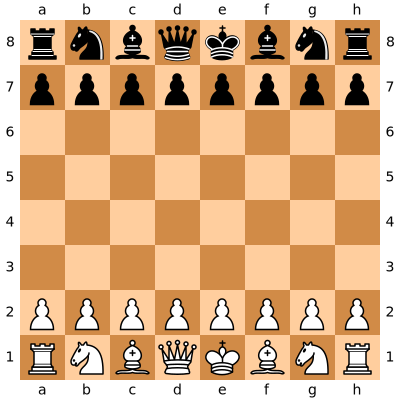

In [31]:
board = chess.Board()
board

In [43]:
#chess.svg.board(board=board , arrows=[(chess.E2, chess.E2)] )
new_board= chess.svg.board(board=board , arrows= [ (  chess.square(0,1) , chess.square(0,1) ) ] )

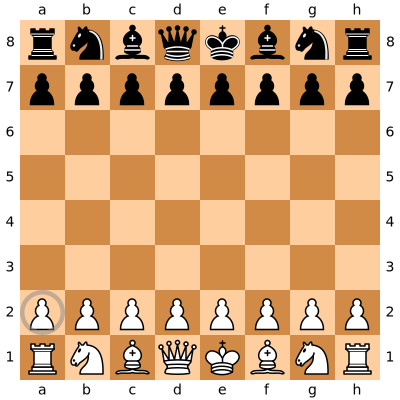

In [44]:
new_board
